# ADULT CENSUS INCOME

## Uso de modelos de Ensambles:
## 1. Random Forests
## 2. Adaboost
## 3. Gradient Boosting (GBM)
## 4. XGBoost


*Veamos el archivo:*

In [1]:
install.packages("caTools")
install.packages("randomForest")
install.packages("caret")
install.packages("MLmetrics")
install.packages("ranger")
install.packages("adabag")
install.packages("gbm")
install.packages("xgboost")
install.packages("Matrix")

library(caret)
library(caTools)
library(dplyr)
library(MLmetrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘X

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




In [2]:
data_new<-read.csv("adult.csv", header=TRUE, sep=";", dec=",")

str(data_new)

'data.frame':	32561 obs. of  14 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : chr  "?" "Private" "?" "Private" ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 216864 150601 88638 422013 70037 ...
 $ education     : chr  "HS-grad" "HS-grad" "Some-college" "7th-8th" ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: chr  "Widowed" "Widowed" "Widowed" "Divorced" ...
 $ occupation    : chr  "?" "Exec-managerial" "?" "Machine-op-inspct" ...
 $ relationship  : chr  "Not-in-family" "Not-in-family" "Unmarried" "Unmarried" ...
 $ race          : chr  "White" "White" "Black" "White" ...
 $ sex           : chr  "Female" "Female" "Female" "Female" ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.per.week: int  40 18 40 40 40 45 40 20 40 60 ...
 $ income        : chr  "<=50K" "<=50K" "<=50K" "<=50K" ...


In [3]:
#Verificación de valores nulos, que están representandos por un "?"
# Convertir "?" a NA en todo el DataFrame
data_new[data_new == "?"] <- NA

any_na <- any(is.na(data_new))
print(any_na)
colSums(is.na(data_new))

[1] TRUE


age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week         income 
             0              0              0              0

In [4]:
# Eliminar las filas con valores nulos
data_new <- na.omit(data_new)
colSums(is.na(data_new))

age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week         income 
             0              0              0              0

In [5]:
str(data_new)

'data.frame':	30718 obs. of  14 variables:
 $ age           : int  82 54 41 34 38 74 68 41 45 38 ...
 $ workclass     : chr  "Private" "Private" "Private" "Private" ...
 $ fnlwgt        : int  132870 140359 264663 216864 150601 88638 422013 70037 172274 164526 ...
 $ education     : chr  "HS-grad" "7th-8th" "Some-college" "HS-grad" ...
 $ education.num : int  9 4 10 9 6 16 9 10 16 15 ...
 $ marital.status: chr  "Widowed" "Divorced" "Separated" "Divorced" ...
 $ occupation    : chr  "Exec-managerial" "Machine-op-inspct" "Prof-specialty" "Other-service" ...
 $ relationship  : chr  "Not-in-family" "Unmarried" "Own-child" "Unmarried" ...
 $ race          : chr  "White" "White" "White" "White" ...
 $ sex           : chr  "Female" "Female" "Female" "Female" ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 3900 3900 3770 3770 3683 3683 3004 3004 2824 ...
 $ hours.per.week: int  18 40 40 45 40 20 40 60 35 45 ...
 $ income        : chr  "<=50K" "<=50K" "<=50K" "<

In [34]:
data_new$income <- factor(data_new$income)

In [35]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X <- select(data_new, -income)
y <- data_new$income

In [36]:
# Split dataset into training set and test set

set.seed(109)

# Crear una división del 75% para entrenamiento y 25% para prueba
split <- sample.split(y, SplitRatio = 0.75)
X_train <- subset(X, split == TRUE)
X_test <- subset(X, split == FALSE)
y_train <- subset(y, split == TRUE)
y_test <- subset(y, split == FALSE)

In [37]:
dim(X_train)

[1] 23039    13

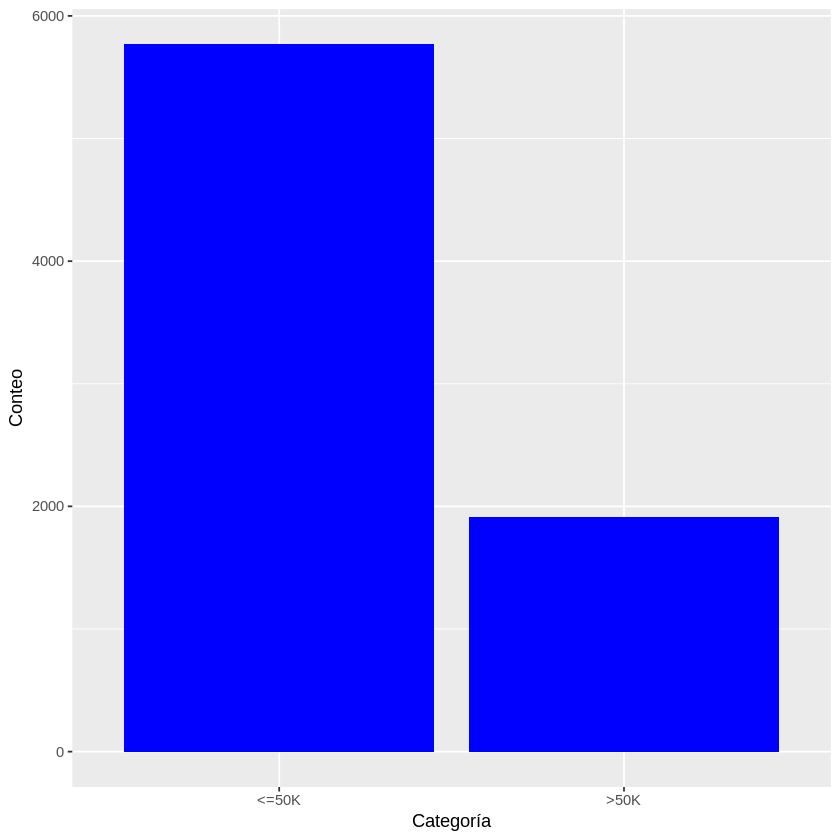

In [38]:
y_test_df <- data.frame(y = factor(y_test))

# Crear el gráfico de conteo
ggplot(y_test_df, aes(x = y)) +
  geom_bar(fill = "blue") +  # Cambia el color según desees
  labs(x = "Categoría", y = "Conteo")

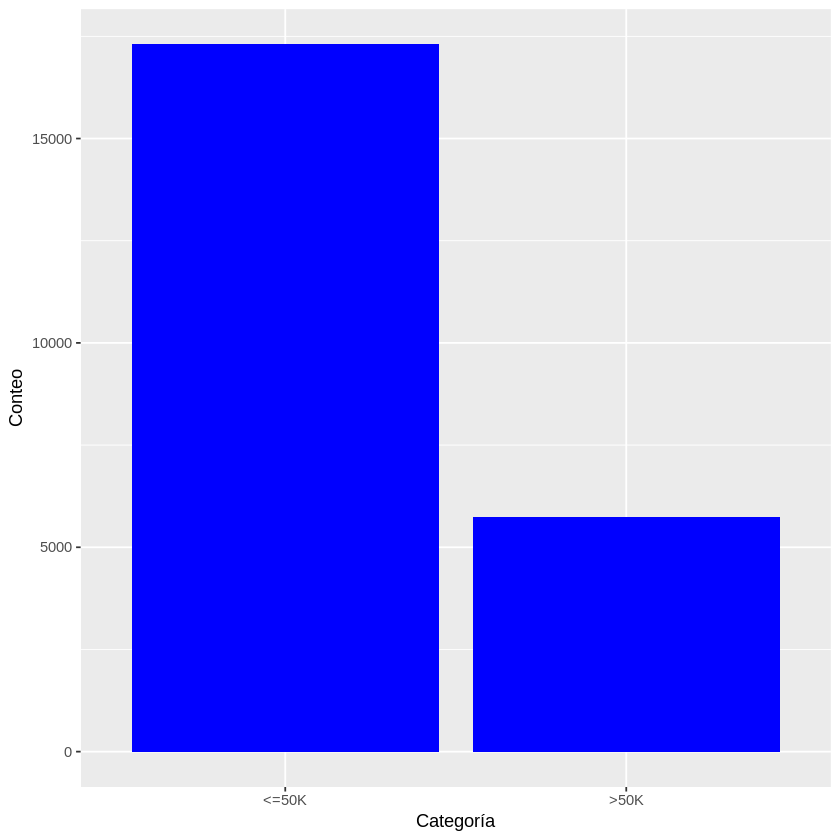

In [39]:
y_train_df <- data.frame(y = factor(y_train))

# Crear el gráfico de conteo
ggplot(y_train_df, aes(x = y)) +
  geom_bar(fill = "blue") +  # Cambia el color según desees
  labs(x = "Categoría", y = "Conteo")

In [46]:
# Convertir a data frames
y_train_df <- data.frame(income = y_train)
y_test_df <- data.frame(income = y_test)

y_train_df$income <- factor(y_train_df$income)
y_test_df$income <- factor(y_test_df$income)

X_train_df <- data.frame(X_train)
X_test_df <- data.frame(X_test)

# **Generación de modelos con base de datos original (desbalanceada)**

**1. RANDOM FOREST**

In [ ]:
library(randomForest)

In [74]:
# Crear el clasificador Random Forest
set.seed(109)
rfc1 <- randomForest(income ~ ., data = cbind(y_train_df, X_train_df), ntree = 100, importance = TRUE)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train <- predict(rfc1, X_train_df)

cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, predictions_train)
print(confusion_matrix_train)
cat("Informe de clasificación para entrenamiento:\n")
print(confusionMatrix(factor(predictions_train), factor(y_train_df$income)))

ENTRENAMIENTO
        predictions_train
         X.50K X..50K
  X.50K   5036    702
  X..50K   392  16909
Informe de clasificación para entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction X.50K X..50K
    X.50K   5036    392
    X..50K   702  16909
                                          
               Accuracy : 0.9525          
                 95% CI : (0.9497, 0.9552)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8707          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8777          
            Specificity : 0.9773          
         Pos Pred Value : 0.9278          
         Neg Pred Value : 0.9601          
             Prevalence : 0.2491          
         Detection Rate : 0.2186          
   Detection Prevalence : 0.2356    

In [44]:
# Revisar clase positiva
levels(y_train_df$income)

[1] "<=50K" ">50K"

In [48]:
# Cambiar la clase positiva
y_train_df$income <- relevel(y_train_df$income, ref = ">50K")
y_test_df$income <- relevel(y_test_df$income, ref = ">50K")
levels(y_test_df$income)

[1] ">50K"  "<=50K"

In [54]:
# Crear el clasificador Random Forest
set.seed(109)
rfc1 <- randomForest(income ~ ., data = cbind(y_train_df, X_train_df), ntree = 100, importance = TRUE)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train <- predict(rfc1, X_train_df)

cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, predictions_train)
print(confusion_matrix_train)
cat("Informe de clasificación para entrenamiento:\n")
print(confusionMatrix(factor(predictions_train), factor(y_train_df$income)))

ENTRENAMIENTO
       predictions_train
         >50K <=50K
  >50K   5036   702
  <=50K   392 16909
Informe de clasificación para entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction  >50K <=50K
     >50K   5036   392
     <=50K   702 16909
                                          
               Accuracy : 0.9525          
                 95% CI : (0.9497, 0.9552)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8707          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8777          
            Specificity : 0.9773          
         Pos Pred Value : 0.9278          
         Neg Pred Value : 0.9601          
             Prevalence : 0.2491          
         Detection Rate : 0.2186          
   Detection Prevalence : 0.2356          
   

In [55]:
# Hacer predicciones en el conjunto de prueba
predictions_test <- predict(rfc1, X_test_df)
cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, predictions_test)
print(confusion_matrix_test)

cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(predictions_test), factor(y_test_df$income)))

cat ("F1 score = ")
print(F1_Score(predictions_test,y_test_df$income))

PRUEBA
       predictions_test
        >50K <=50K
  >50K  1225   687
  <=50K  349  5418
Informe de clasificación para prueba:
Confusion Matrix and Statistics

          Reference
Prediction >50K <=50K
     >50K  1225   349
     <=50K  687  5418
                                          
               Accuracy : 0.8651          
                 95% CI : (0.8572, 0.8727)
    No Information Rate : 0.751           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6166          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6407          
            Specificity : 0.9395          
         Pos Pred Value : 0.7783          
         Neg Pred Value : 0.8875          
             Prevalence : 0.2490          
         Detection Rate : 0.1595          
   Detection Prevalence : 0.2050          
      Balanced Accuracy 

In [57]:
# Crear un segundo clasificador Random Forest
rfc2 <- randomForest(income ~ ., data = cbind(y_train_df, X_train_df), ntree = 100, max.depth = 10)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train <- predict(rfc2, X_train_df)
cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, predictions_train)
print(confusion_matrix_train)
cat("Informe de clasificación para entrenamiento:\n")
print(confusionMatrix(factor(predictions_train), factor(y_train_df$income)))

# Hacer predicciones en el conjunto de prueba
predictions_test <- predict(rfc2, X_test_df)
cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, predictions_test)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(predictions_test), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(predictions_test,y_test_df$income))

ENTRENAMIENTO
       predictions_train
         >50K <=50K
  >50K   4966   772
  <=50K   420 16881
Informe de clasificación para entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction  >50K <=50K
     >50K   4966   420
     <=50K   772 16881
                                          
               Accuracy : 0.9483          
                 95% CI : (0.9453, 0.9511)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8588          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8655          
            Specificity : 0.9757          
         Pos Pred Value : 0.9220          
         Neg Pred Value : 0.9563          
             Prevalence : 0.2491          
         Detection Rate : 0.2155          
   Detection Prevalence : 0.2338          
   

In [60]:
# Crear un tercer clasificador Random Forest
rfc3 <- randomForest(income ~ ., data = cbind(y_train_df, X_train_df), ntree = 100, mtry = 4)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train <- predict(rfc3, X_train_df)
cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, predictions_train)
print(confusion_matrix_train)
cat("Informe de clasificación para entrenamiento:\n")
print(confusionMatrix(factor(predictions_train), factor(y_train_df$income)))

# Hacer predicciones en el conjunto de prueba
predictions_test <- predict(rfc3, X_test_df)
cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, predictions_test)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(predictions_test), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(predictions_test,y_test_df$income))

ENTRENAMIENTO
       predictions_train
         >50K <=50K
  >50K   5432   306
  <=50K   155 17146
Informe de clasificación para entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction  >50K <=50K
     >50K   5432   155
     <=50K   306 17146
                                          
               Accuracy : 0.98            
                 95% CI : (0.9781, 0.9818)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.946           
                                          
 Mcnemar's Test P-Value : 2.824e-12       
                                          
            Sensitivity : 0.9467          
            Specificity : 0.9910          
         Pos Pred Value : 0.9723          
         Neg Pred Value : 0.9825          
             Prevalence : 0.2491          
         Detection Rate : 0.2358          
   Detection Prevalence : 0.2425          
   

In [61]:
# Crear un cuarto clasificador Random Forest
rfc4 <- randomForest(income ~ ., data = cbind(y_train_df, X_train_df), ntree = 100, max_depth = 10, mtry = 4)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train <- predict(rfc4, X_train_df)
cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, predictions_train)
print(confusion_matrix_train)
cat("Informe de clasificación para entrenamiento:\n")
print(confusionMatrix(factor(predictions_train), factor(y_train_df$income)))

# Hacer predicciones en el conjunto de prueba
predictions_test <- predict(rfc4, X_test_df)
cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, predictions_test)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(predictions_test), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(predictions_test,y_test_df$income))

ENTRENAMIENTO
       predictions_train
         >50K <=50K
  >50K   5454   284
  <=50K   155 17146
Informe de clasificación para entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction  >50K <=50K
     >50K   5454   155
     <=50K   284 17146
                                          
               Accuracy : 0.9809          
                 95% CI : (0.9791, 0.9827)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9487          
                                          
 Mcnemar's Test P-Value : 1.002e-09       
                                          
            Sensitivity : 0.9505          
            Specificity : 0.9910          
         Pos Pred Value : 0.9724          
         Neg Pred Value : 0.9837          
             Prevalence : 0.2491          
         Detection Rate : 0.2367          
   Detection Prevalence : 0.2435          
   

In [80]:
levels(y_train_df$income) <- make.names(levels(y_train_df$income))
levels(y_test_df$income) <- make.names(levels(y_test_df$income))
print(levels(y_test_df$income))

[1] "X.50K"  "X..50K"


In [64]:
library(ranger)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [73]:
set.seed(123)
formula <- income ~ .

# Definir el control de entrenamiento
train_control <- trainControl(method = "cv",
                              number = 5,
                              summaryFunction = multiClassSummary,
                              classProbs = TRUE)

# Definir los parámetros a ajustar
parameters <- expand.grid(mtry = c(4, 8, 12),        # Número de variables a considerar en cada división
                          splitrule = "gini",        # Regla de división, puedes usar "gini" o "extratrees"
                          min.node.size = c(1, 5, 10)) # Tamaño mínimo del nodo terminal


# Realizar la búsqueda en cuadrícula
grid_search <- train(formula,
                     data = cbind(y_train_df, X_train_df),
                     method = "ranger",
                     trControl = train_control,
                     tuneGrid = parameters,
                     metric = "Kappa")

# Mejor modelo encontrado
best_model <- grid_search$bestTune
print(best_model)
print(grid_search)

Growing trees.. Progress: 90%. Estimated remaining time: 3 seconds.
Growing trees.. Progress: 92%. Estimated remaining time: 2 seconds.
Growing trees.. Progress: 84%. Estimated remaining time: 5 seconds.
  mtry splitrule min.node.size
8   12      gini             5
Random Forest 

23039 samples
   13 predictor
    2 classes: 'X.50K', 'X..50K' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 18431, 18432, 18430, 18432, 18431 
Resampling results across tuning parameters:

  mtry  min.node.size  logLoss    AUC        prAUC      Accuracy   Kappa    
   4     1             0.3220369  0.9129774  0.8826844  0.8563300  0.5797447
   4     5             0.3223400  0.9129784  0.8825868  0.8566338  0.5810317
   4    10             0.3225956  0.9129051  0.8823757  0.8561129  0.5793636
   8     1             0.3105572  0.9132919  0.8750673  0.8577624  0.5935772
   8     5             0.3111578  0.9134629  0.8746123  0.8579793  0.5934547
   8    10             0.3103

In [75]:
set.seed(123)
formula <- income ~ .

# Definir el control de entrenamiento
train_control <- trainControl(method = "cv",
                              number = 5,
                              summaryFunction = multiClassSummary,
                              classProbs = TRUE)

# Definir los parámetros a ajustar
parameters <- expand.grid(mtry = c(12, 14, 16),        # Número de variables a considerar en cada división
                          splitrule = "gini",        # Regla de división, puedes usar "gini" o "extratrees"
                          min.node.size = c(10, 20, 30)) # Tamaño mínimo del nodo terminal


# Realizar la búsqueda en cuadrícula
grid_search <- train(formula,
                     data = cbind(y_train_df, X_train_df),
                     method = "ranger",
                     trControl = train_control,
                     tuneGrid = parameters,
                     metric = "Kappa")

# Mejor modelo encontrado
best_model <- grid_search$bestTune
print(best_model)
print(grid_search)

Growing trees.. Progress: 99%. Estimated remaining time: 0 seconds.
Growing trees.. Progress: 93%. Estimated remaining time: 2 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 73%. Estimated remaining time: 11 seconds.
  mtry splitrule min.node.size
6   14      gini            30
Random Forest 

23039 samples
   13 predictor
    2 classes: 'X.50K', 'X..50K' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 18431, 18432, 18430, 18432, 18431 
Resampling results across tuning parameters:

  mtry  min.node.size  logLoss    AUC        prAUC      Accuracy   Kappa    
  12    10             0.3128452  0.9122197  0.8435772  0.8579358  0.5952357
  12    20             0.3105224  0.9129607  0.8531100  0.8586737  0.5964792
  12    30             0.3094647  0.9135575  0.8611727  0.8590644  0.5969084
  14    10             0.3140270  0.9113525  0.8318181  0.8575452  0.5946249
  14    20             0.3107056  0.9

In [81]:
# Crear un último clasificador Random Forest con los hiperparámetros sintonizados
rfc4 <- randomForest(income ~ ., data = cbind(y_train_df, X_train_df), mtry = 4, splitrule = "gini", min.node.size = 30)

# Hacer predicciones en el conjunto de entrenamiento
predictions_train <- predict(rfc4, X_train_df)
cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, predictions_train)
print(confusion_matrix_train)
cat("Informe de clasificación para entrenamiento:\n")
print(confusionMatrix(factor(predictions_train), factor(y_train_df$income)))

# Hacer predicciones en el conjunto de prueba
predictions_test <- predict(rfc4, X_test_df)
cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, predictions_test)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(predictions_test), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(predictions_test,y_test_df$income))

ENTRENAMIENTO
        predictions_train
         X.50K X..50K
  X.50K   5467    271
  X..50K   145  17156
Informe de clasificación para entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction X.50K X..50K
    X.50K   5467    145
    X..50K   271  17156
                                          
               Accuracy : 0.9819          
                 95% CI : (0.9801, 0.9836)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9514          
                                          
 Mcnemar's Test P-Value : 8.864e-10       
                                          
            Sensitivity : 0.9528          
            Specificity : 0.9916          
         Pos Pred Value : 0.9742          
         Neg Pred Value : 0.9844          
             Prevalence : 0.2491          
         Detection Rate : 0.2373          
   Detection Prevalence : 0.2436    

## **2. ADABOOST**

In [3]:
library(adabag)

Loading required package: rpart

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



In [4]:
data_new<-read.csv("adult.csv", header=TRUE, sep=";", dec=",")
data_new[data_new == "?"] <- NA
data_new <- na.omit(data_new)

In [5]:
data_new <- data_new %>%
  mutate(across(where(is.character), as.factor))

# Separar las variables independientes (X) y dependientes (y)
X <- data_new %>% select(-income)
y <- data_new$income

set.seed(109)  # Para reproducibilidad
trainIndex <- createDataPartition(y, p = .75,
                                  list = FALSE,
                                  times = 1)
X_train <- X[trainIndex, ]
y_train <- y[trainIndex]
X_test <- X[-trainIndex, ]
y_test <- y[-trainIndex]

In [16]:
# Convertir a data frames
y_train_df <- data.frame(income = y_train)
y_test_df <- data.frame(income = y_test)

y_train_df$income <- factor(y_train_df$income)
y_test_df$income <- factor(y_test_df$income)

X_train_df <- data.frame(X_train)
X_test_df <- data.frame(X_test)

In [18]:
# Cambiar la clase positiva
y_train_df$income <- relevel(y_train_df$income, ref = ">50K")
y_test_df$income <- relevel(y_test_df$income, ref = ">50K")
levels(y_test_df$income)

[1] ">50K"  "<=50K"

In [19]:
# Primer clasificador ADABOOST
clf <- boosting(income ~ ., data = data.frame(X_train_df, income = y_train_df), mfinal = 100, coeflearn = 'Breiman')

# Hacer predicciones
train_predictions <- predict(clf, newdata = data.frame(X_train_df))
test_predictions <- predict(clf, newdata = data.frame(X_test_df))

ENTRENAMIENTO


ERROR: Error in xtfrm.data.frame(x): cannot xtfrm data frames


In [35]:
cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, test_predictions$class)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(test_predictions$class), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(test_predictions$class,y_test_df$income))

PRUEBA
       
        <=50K >50K
  >50K    692 1220
  <=50K  5414  353
Informe de clasificación para prueba:


Warning message in confusionMatrix.default(factor(test_predictions$class), factor(y_test_df$income)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction >50K <=50K
     >50K  1220   353
     <=50K  692  5414
                                         
               Accuracy : 0.8639         
                 95% CI : (0.856, 0.8715)
    No Information Rate : 0.751          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6132         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.6381         
            Specificity : 0.9388         
         Pos Pred Value : 0.7756         
         Neg Pred Value : 0.8867         
             Prevalence : 0.2490         
         Detection Rate : 0.1589         
   Detection Prevalence : 0.2048         
      Balanced Accuracy : 0.7884         
                                         
       'Positive' Class : >50K           
                                         

In [36]:
# Segundo clasificador ADABOOST usando 150 estimadores

clf <- boosting(income ~ ., data = data.frame(X_train, income = y_train), mfinal = 150)

# Hacer predicciones
train_predictions <- predict(clf, newdata = data.frame(X_train))
test_predictions <- predict(clf, newdata = data.frame(X_test))

cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, train_predictions$class)
print(confusion_matrix_train)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(train_predictions$class), factor(y_train_df$income)))

cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, test_predictions$class)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(test_predictions$class), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(test_predictions$class,y_test_df$income))

ENTRENAMIENTO
       
        <=50K  >50K
  >50K   1888  3850
  <=50K 15988  1313
Informe de clasificación para prueba:


Warning message in confusionMatrix.default(factor(train_predictions$class), factor(y_train_df$income)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  >50K <=50K
     >50K   3850  1313
     <=50K  1888 15988
                                          
               Accuracy : 0.8611          
                 95% CI : (0.8565, 0.8655)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6157          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6710          
            Specificity : 0.9241          
         Pos Pred Value : 0.7457          
         Neg Pred Value : 0.8944          
             Prevalence : 0.2491          
         Detection Rate : 0.1671          
   Detection Prevalence : 0.2241          
      Balanced Accuracy : 0.7975          
                                          
       'Positive' Class : >50K            
                  

Warning message in confusionMatrix.default(factor(test_predictions$class), factor(y_test_df$income)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction >50K <=50K
     >50K  1281   412
     <=50K  631  5355
                                          
               Accuracy : 0.8642          
                 95% CI : (0.8563, 0.8718)
    No Information Rate : 0.751           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6224          
                                          
 Mcnemar's Test P-Value : 1.477e-11       
                                          
            Sensitivity : 0.6700          
            Specificity : 0.9286          
         Pos Pred Value : 0.7566          
         Neg Pred Value : 0.8946          
             Prevalence : 0.2490          
         Detection Rate : 0.1668          
   Detection Prevalence : 0.2205          
      Balanced Accuracy : 0.7993          
                                          
       'Positive' Class : >50K            
                     

In [37]:
#Tercer clasificador ADABOOST usando 50 estimadores

clf <- boosting(income ~ ., data = data.frame(X_train, income = y_train), mfinal = 50)

# Hacer predicciones
train_predictions <- predict(clf, newdata = data.frame(X_train))
test_predictions <- predict(clf, newdata = data.frame(X_test))

cat("ENTRENAMIENTO\n")
confusion_matrix_train <- table(y_train_df$income, train_predictions$class)
print(confusion_matrix_train)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(train_predictions$class), factor(y_train_df$income)))

cat("PRUEBA\n")
confusion_matrix_test <- table(y_test_df$income, test_predictions$class)
print(confusion_matrix_test)
cat("Informe de clasificación para prueba:\n")
print(confusionMatrix(factor(test_predictions$class), factor(y_test_df$income)))
cat ("F1 score = ")
print(F1_Score(test_predictions$class,y_test_df$income))

ENTRENAMIENTO
       
        <=50K  >50K
  >50K   1966  3772
  <=50K 16005  1296
Informe de clasificación para prueba:


Warning message in confusionMatrix.default(factor(train_predictions$class), factor(y_train_df$income)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  >50K <=50K
     >50K   3772  1296
     <=50K  1966 16005
                                          
               Accuracy : 0.8584          
                 95% CI : (0.8538, 0.8629)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6061          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6574          
            Specificity : 0.9251          
         Pos Pred Value : 0.7443          
         Neg Pred Value : 0.8906          
             Prevalence : 0.2491          
         Detection Rate : 0.1637          
   Detection Prevalence : 0.2200          
      Balanced Accuracy : 0.7912          
                                          
       'Positive' Class : >50K            
                  

Warning message in confusionMatrix.default(factor(test_predictions$class), factor(y_test_df$income)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction >50K <=50K
     >50K  1294   412
     <=50K  618  5355
                                         
               Accuracy : 0.8659         
                 95% CI : (0.858, 0.8734)
    No Information Rate : 0.751          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6279         
                                         
 Mcnemar's Test P-Value : 1.685e-10      
                                         
            Sensitivity : 0.6768         
            Specificity : 0.9286         
         Pos Pred Value : 0.7585         
         Neg Pred Value : 0.8965         
             Prevalence : 0.2490         
         Detection Rate : 0.1685         
   Detection Prevalence : 0.2222         
      Balanced Accuracy : 0.8027         
                                         
       'Positive' Class : >50K           
                                         

## **3. GBM**

In [38]:
library(gbm)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [42]:
# Primer clasificador GRADIENT BOOSTING
# Convertir income en 0 y 1 ya que gbm requiere que la variable de respuesta sea numérica, cuando se usa la distribución bernoulli
y_train_bin <- ifelse(y_train == ">50K", 1, 0)
y_test_bin <- ifelse(y_test == ">50K", 1, 0)

set.seed(0)
gb_model <- gbm(
  formula = income ~ .,
  data = data.frame(X_train, income = y_train_bin),
  distribution = "bernoulli",                        # Distribución para clasificación binaria
  n.trees = 100                                      # Número de árboles
)

# En el conjunto de entrenamiento
train_predictions <- predict(gb_model, X_train, n.trees = 100, type = "response")
train_class <- ifelse(train_predictions > 0.5, 1, 0)
cat("ENTRENAMIENTO\n")
confusion_train <- confusionMatrix(factor(train_class), factor(y_train_bin))
print(confusion_train)

# En el conjunto de prueba
test_predictions <- predict(gb_model, X_test, n.trees = 100, type = "response")
test_class <- ifelse(test_predictions > 0.5, 1, 0)
cat("PRUEBA\n")
confusion_test <- confusionMatrix(factor(test_class), factor(y_test_bin))
print(confusion_test)

ENTRENAMIENTO
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 16533  2640
         1   768  3098
                                          
               Accuracy : 0.8521          
                 95% CI : (0.8474, 0.8566)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5562          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9556          
            Specificity : 0.5399          
         Pos Pred Value : 0.8623          
         Neg Pred Value : 0.8013          
             Prevalence : 0.7509          
         Detection Rate : 0.7176          
   Detection Prevalence : 0.8322          
      Balanced Accuracy : 0.7478          
                                          
       'Positive' Class : 0               
    

In [43]:
# Segundo clasificador GRADIENT BOOSTING
# Entrenar el modelo de Gradient Boosting
set.seed(0)
gb_model <- gbm(
  formula = income ~ .,
  data = data.frame(X_train, income = y_train_bin),
  distribution = "bernoulli",
  n.trees = 300,                                    # Número de árboles
  interaction.depth = 3,                             # Profundidad máxima de los árboles
  shrinkage = 0.05,                                 # Tasa de aprendizaje
  verbose = FALSE
)

#En el conjunto de entrenamiento
train_predictions <- predict(gb_model, newdata = X_train, n.trees = 300, type = "response")
train_class <- ifelse(train_predictions > 0.5, 1, 0)
cat("ENTRENAMIENTO\n")
print(table(Predicted = train_class, Actual = y_train_bin))
test_predictions <- predict(gb_model, newdata = X_test, n.trees = 300, type = "response")
test_class <- ifelse(test_predictions > 0.5, 1, 0)

# En el comjunto de prueba
cat("PRUEBA\n")
print(table(Predicted = test_class, Actual = y_test_bin))
cat("Métricas de rendimiento en el conjunto de prueba:\n")
confusion_matrix <- confusionMatrix(as.factor(test_class), as.factor(y_test_bin))
print(confusion_matrix)

ENTRENAMIENTO
         Actual
Predicted     0     1
        0 16288  2128
        1  1013  3610
PRUEBA
         Actual
Predicted    0    1
        0 5459  707
        1  308 1205
Métricas de rendimiento en el conjunto de prueba:
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5459  707
         1  308 1205
                                        
               Accuracy : 0.8678        
                 95% CI : (0.86, 0.8753)
    No Information Rate : 0.751         
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6201        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9466        
            Specificity : 0.6302        
         Pos Pred Value : 0.8853        
         Neg Pred Value : 0.7964        
             Prevalence : 0.7510        
         Detection Rate : 0.7109        

In [ ]:
# Sintonización de parámetros para modelo GBM


# Configurar la búsqueda de hiperparámetros
control <- trainControl(method = "cv", number = 5)

# Rango de hiperparámetros
grid <- expand.grid(
  n.trees = c(100, 50, 70),         # número de árboles
  interaction.depth = c(2, 4, 6),     # profundidad máxima de los árboles
  shrinkage = c(0.8, 1.0, 1.2),       # tasa de aprendizaje
  n.minobsinnode = 10                 # número mínimo de observaciones en cada nodo
)

set.seed(42)
boosted_model <- train(
  income ~ ., data = data.frame(X_train, income = y_train),
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "Accuracy",
  verbose = FALSE
)

best_model <- boosted_model$bestTune
print(best_model)


In [ ]:
# En el conjunto de entrenamiento
train_predictions <- predict(boosted_model, X_train)
train_confusion <- confusionMatrix(train_predictions, y_train)
cat("ENTRENAMIENTO\n")
print(train_confusion)

#En el conjunto de prueba
test_predictions <- predict(boosted_model, X_test)
test_confusion <- confusionMatrix(test_predictions, y_test)
cat("PRUEBA\n")
print(test_confusion)


In [ ]:
## Sintonización de parámetros para modelo GRADIENT BOOSTING
control <- trainControl(method = "cv", number = 5)

# Definir los parámetros a sintonizar
grid <- expand.grid(
  n.trees = c(100, 200, 300),        # Número de árboles
  interaction.depth = c(2, 4, 6),    # Profundidad máxima de los árboless
  shrinkage = c(0.05, 0.1, 0.15),     # Tasa de aprendizaje
  n.minobsinnode = c(10, 20)          # Mínimo de observaciones en un nodo
)

# Sintonizar el modelo de Gradient Boosting
set.seed(0)
gb_model <- train(
  income ~ .,
  data = data.frame(X_train, income = y_train),
  method = "gbm",
  trControl = control,
  tuneGrid = grid,
  metric = "Kappa",
  verbose = FALSE
)

#mejores parametros
best_params <- gb_model$bestTune
print("Mejores parámetros:")
print(best_params)

# Evaluar el modelo en el conjunto de entrenamiento
train_predictions <- predict(gb_model, newdata = data.frame(X_train))
cat("ENTRENAMIENTO\n")
print(confusionMatrix(train_predictions, y_train))

# Evaluar el modelo en el conjunto de prueba
test_predictions <- predict(gb_model, newdata = data.frame(X_test))
cat("PRUEBA\n")
print(confusionMatrix(test_predictions, y_test))

[1] "Mejores parámetros:"
   n.trees interaction.depth shrinkage n.minobsinnode
53     200                 6      0.15             20
ENTRENAMIENTO
Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 16319  1871
     >50K    982  3867
                                          
               Accuracy : 0.8762          
                 95% CI : (0.8718, 0.8804)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6509          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9432          
            Specificity : 0.6739          
         Pos Pred Value : 0.8971          
         Neg Pred Value : 0.7975          
             Prevalence : 0.7509          
         Detection Rate : 0.7083          
   Detection Prevalence : 0.7895          

## **4. XGBoost**

In [ ]:
library(xgboost)
library(Matrix)

In [ ]:
#Procesamiento requerido para XGBoost
X_train_numeric <- model.matrix(~ . - 1, data = X_train)
X_test_numeric <- model.matrix(~ . - 1, data = X_test)

# Convertir y_train y y_test en binario
y_train_binary <- as.numeric(y_train == ">50K")
y_test_binary <- as.numeric(y_test == ">50K")

# Crear los DMatrix necesarios para xgboost
dtrain <- xgb.DMatrix(data = X_train_numeric, label = y_train_binary)
dtest <- xgb.DMatrix(data = X_test_numeric, label = y_test_binary)

In [ ]:
# Primer clasificador XGBOOST
params <- list(
  objective = "binary:logistic",  # Para clasificación binaria
  eval_metric = "logloss",        # Métrica de evaluación: logloss
  n_estimators = 100              # Número de árboles de decisión
)

# Entrenar el modelo
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100
)

[00:55:21] WARNING: src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Métricas (Entrenamiento):
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 15215   564
         1  2086  5174
                                          
               Accuracy : 0.885           
                 95% CI : (0.8808, 0.8891)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7175          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9017          
            Specificity : 0.8794          
         Pos Pred Value : 0.7127          
         Neg Pred Value : 0.9643          
             Prevalence : 0.2491          
         Detection Rate : 0.2246          
   Detection Prevalence : 0.3151          
      Balanced Accuracy : 0.8906  

In [ ]:
# Predicciones en el conjunto de entrenamiento
train_preds <- predict(xgb_model, dtrain)
train_preds_class <- ifelse(train_preds > 0.4, 1, 0)
cat("Métricas (Entrenamiento):\n")
train_metrics <- confusionMatrix(as.factor(train_preds_class), as.factor(y_train_binary), positive = "1")
print(train_metrics)

# Predicciones en el conjunto de prueba
test_preds <- predict(xgb_model, dtest)
test_preds_class <- ifelse(test_preds > 0.4, 1, 0)
cat("\nMétricas (Prueba):\n")
test_metrics <- confusionMatrix(as.factor(test_preds_class), as.factor(y_test_binary), positive = "1")
print(test_metrics)

Métricas (Entrenamiento):
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 16034   962
         1  1267  4776
                                         
               Accuracy : 0.9033         
                 95% CI : (0.8994, 0.907)
    No Information Rate : 0.7509         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7459         
                                         
 Mcnemar's Test P-Value : 1.203e-10      
                                         
            Sensitivity : 0.8323         
            Specificity : 0.9268         
         Pos Pred Value : 0.7903         
         Neg Pred Value : 0.9434         
             Prevalence : 0.2491         
         Detection Rate : 0.2073         
   Detection Prevalence : 0.2623         
      Balanced Accuracy : 0.8796         
                                         
       'Positive' Class : 1              
            

In [ ]:
# Segundo clasificador XGBOOST aumentando el número de árboles de decisión
params <- list(
  objective = "binary:logistic",  # Para clasificación binaria
  eval_metric = "logloss",        # Métrica de evaluación: logloss
  n_estimators = 200              # Número de árboles de decisión
)

# Entrenar el modelo
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100
)

# Predicciones en el conjunto de entrenamiento
train_preds <- predict(xgb_model, dtrain)
train_preds_class <- ifelse(train_preds > 0.3, 1, 0)
cat("Métricas (Entrenamiento):\n")
train_metrics <- confusionMatrix(as.factor(train_preds_class), as.factor(y_train_binary), positive = "1")
print(train_metrics)

# Predicciones en el conjunto de prueba
test_preds <- predict(xgb_model, dtest)
test_preds_class <- ifelse(test_preds > 0.3, 1, 0)
cat("\nMétricas (Prueba):\n")
test_metrics <- confusionMatrix(as.factor(test_preds_class), as.factor(y_test_binary), positive = "1")
print(test_metrics)

[00:58:20] WARNING: src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Métricas (Entrenamiento):
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 15215   564
         1  2086  5174
                                          
               Accuracy : 0.885           
                 95% CI : (0.8808, 0.8891)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7175          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9017          
            Specificity : 0.8794          
         Pos Pred Value : 0.7127          
         Neg Pred Value : 0.9643          
             Prevalence : 0.2491          
         Detection Rate : 0.2246          
   Detection Prevalence : 0.3151          
      Balanced Accuracy : 0.8906  

In [ ]:
# Tercer calsificador: Sintonización de parámetros para modelo GRADIENT BOOSTING
y_train_factor <- factor(ifelse(y_train == ">50K", "yes", "no"))
train_data <- data.frame(X_train_numeric, y = y_train_factor)


control <- trainControl(
  method = "none"
)

# Definir conjunto de hiperparámetros
tune_grid <- expand.grid(
  nrounds = 100,
  max_depth = 6,
  eta = 0.3,
  gamma = 0,
  colsample_bytree = 0.8,
  min_child_weight = 1,
  subsample = 0.8
)

# Entrenar el modelo con los hiperparámetros especificados
set.seed(49)
xgb_tuned <- train(
  y ~ .,
  data = train_data,
  method = "xgbTree",
  trControl = control,
  tuneGrid = tune_grid,
  metric = "Accuracy"
)
print(xgb_tuned)

eXtreme Gradient Boosting 

23039 samples
   57 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: None 


In [ ]:
# Predicciones en el conjunto de entrenamiento
train_preds <- predict(xgb_tuned, newdata = train_data)
train_cm <- confusionMatrix(train_preds, y_train_factor)
cat("Evaluación en el conjunto de entrenamiento:\n")
print(train_cm)

# Predicciones en el conjunto de prueba
y_test_factor <- factor(ifelse(y_test == ">50K", "yes", "no"))
test_data <- data.frame(X_test_numeric, y = y_test_factor)
test_preds <- predict(xgb_tuned, newdata = test_data)
test_cm <- confusionMatrix(test_preds, y_test_factor)
cat("\nEvaluación en el conjunto de prueba:\n")
print(test_cm)


Evaluación en el conjunto de entrenamiento:
Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  16560  1436
       yes   741  4302
                                          
               Accuracy : 0.9055          
                 95% CI : (0.9017, 0.9093)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7367          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9572          
            Specificity : 0.7497          
         Pos Pred Value : 0.9202          
         Neg Pred Value : 0.8531          
             Prevalence : 0.7509          
         Detection Rate : 0.7188          
   Detection Prevalence : 0.7811          
      Balanced Accuracy : 0.8535          
                                          
       'Positive'

**5. ADABOOST.M1**

In [ ]:
install.packages("adabag")
library(adabag)

# Entrenar el modelo AdaBoost.M1
ada_model <- boosting(income ~ ., data = data.frame(X_train, income = y_train), mfinal = 50) # mfinal: Número de iteraciones (árboles)

# Predicciones en el conjunto de entrenamiento
train_predictions <- predict(ada_model, newdata = data.frame(X_train))
cat("ENTRENAMIENTO\n")
print(confusionMatrix(factor(train_predictions$class), factor(y_train)))

# Predicciones en el conjunto de prueba
test_predictions <- predict(ada_model, newdata = data.frame(X_test))
cat("PRUEBA\n")
print(confusionMatrix(factor(test_predictions$class), factor(y_test)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ENTRENAMIENTO
Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 15965  1949
     >50K   1336  3789
                                          
               Accuracy : 0.8574          
                 95% CI : (0.8528, 0.8619)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6047          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9228          
            Specificity : 0.6603          
         Pos Pred Value : 0.8912          
         Neg Pred Value : 0.7393          
             Prevalence : 0.7509          
         Detection Rate : 0.6930          
   Detection Prevalence : 0.7776          
      Balanced Accuracy : 0.7916          
                                          
       'Positive' Class : <=50K           
    

In [ ]:
# Entrenar el modelo AdaBoost.M1
ada_model2 <- boosting(income ~ ., data = data.frame(X_train, income = y_train), mfinal = 100) # mfinal: Número de iteraciones (árboles)

# Predicciones en el conjunto de entrenamiento
train_predictions <- predict(ada_model2, newdata = data.frame(X_train))
cat("ENTRENAMIENTO\n")
print(confusionMatrix(factor(train_predictions$class), factor(y_train)))

# Predicciones en el conjunto de prueba
test_predictions <- predict(ada_model2, newdata = data.frame(X_test))
cat("PRUEBA\n")
print(confusionMatrix(factor(test_predictions$class), factor(y_test)))

ENTRENAMIENTO
Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 16152  2093
     >50K   1149  3645
                                          
               Accuracy : 0.8593          
                 95% CI : (0.8547, 0.8637)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6019          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9336          
            Specificity : 0.6352          
         Pos Pred Value : 0.8853          
         Neg Pred Value : 0.7603          
             Prevalence : 0.7509          
         Detection Rate : 0.7011          
   Detection Prevalence : 0.7919          
      Balanced Accuracy : 0.7844          
                                          
       'Positive' Class : <=50K           
    

In [ ]:
# Entrenar el modelo AdaBoost.M1
ada_model3 <- boosting(income ~ ., data = data.frame(X_train, income = y_train), mfinal = 20) # mfinal: Número de iteraciones (árboles)

# Predicciones en el conjunto de entrenamiento
train_predictions <- predict(ada_model3, newdata = data.frame(X_train))
cat("ENTRENAMIENTO\n")
print(confusionMatrix(factor(train_predictions$class), factor(y_train)))

# Predicciones en el conjunto de prueba
test_predictions <- predict(ada_model3, newdata = data.frame(X_test))
cat("PRUEBA\n")
print(confusionMatrix(factor(test_predictions$class), factor(y_test)))

ENTRENAMIENTO
Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 16128  2102
     >50K   1173  3636
                                          
               Accuracy : 0.8578          
                 95% CI : (0.8533, 0.8623)
    No Information Rate : 0.7509          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5982          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9322          
            Specificity : 0.6337          
         Pos Pred Value : 0.8847          
         Neg Pred Value : 0.7561          
             Prevalence : 0.7509          
         Detection Rate : 0.7000          
   Detection Prevalence : 0.7913          
      Balanced Accuracy : 0.7829          
                                          
       'Positive' Class : <=50K           
    